In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import numpy as np

from openpathsampling.analysis.tis_analysis import TISTransition

storage = paths.storage.Storage("toy_tis.nc", mode="r")
print len(storage.sample)

2790


In [2]:
print len(storage.sampleset)
print len(storage.sample)

2785
2790


In [3]:
print storage.sampleset[0].samples

[<Sample @ 0x1193a7950>, <Sample @ 0x1193a74d0>, <Sample @ 0x1193a7a50>, <Sample @ 0x1193892d0>, <Sample @ 0x119389910>, <Sample @ 0x119389a10>]


In [4]:
ensembles=storage.ensemble[:]

In [5]:
ensembles

In [6]:
stateA = ensembles[1].ensembles[2].ensemble.volume.volume1
stateB = ensembles[1].ensembles[2].ensemble.volume.volume2
interfaces = [e.ensembles[1].ensemble2.volume for e in ensembles[:]]
op = ensembles[1].ensembles[0].ensemble.volume.orderparameter

In [7]:
lmax = [e.ensembles[1].ensemble2.volume.lambda_max for e in ensembles[:]]
print lmax

[-0.3, -0.25, -0.2, -0.13, -0.05, 0.0]


In [8]:
tis = TISTransition(stateA=stateA, stateB=stateB, orderparameter=op, interfaces=interfaces, name="A->B", storage=storage)

In [9]:
tis.ensembles = ensembles
for ensemble in tis.ensembles:
    ensemble.name = "I'face "+str(tis.ensembles.index(ensemble))

In [10]:
tis.ensemble_histogram_info['pathlength'].hist_args = { 'bin_width' : 5, 'bin_range' : (0, 100) }
tis.ensemble_histogram_info['max_lambda'].hist_args = { 'bin_width' : 0.01, 'bin_range' : (-0.35, 0.35) }

In [11]:
%%time
tis.all_statistics(samples=storage.sample, weights=None, force=True)

CPU times: user 1min 26s, sys: 2.54 s, total: 1min 28s
Wall time: 1min 28s


In [12]:
tis.histograms

{'max_lambda': {<openpathsampling.ensemble.SequentialEnsemble at 0x110ec4910>: <openpathsampling.analysis.histogram.Histogram at 0x11af01450>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x119262a10>: <openpathsampling.analysis.histogram.Histogram at 0x11edd24d0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x1193890d0>: <openpathsampling.analysis.histogram.Histogram at 0x11bc09350>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x119389c50>: <openpathsampling.analysis.histogram.Histogram at 0x11938af10>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x1193a70d0>: <openpathsampling.analysis.histogram.Histogram at 0x11db350d0>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x1193a7590>: <openpathsampling.analysis.histogram.Histogram at 0x11ce9dd90>},
 'pathlength': {<openpathsampling.ensemble.SequentialEnsemble at 0x110ec4910>: <openpathsampling.analysis.histogram.Histogram at 0x11bc09050>,
  <openpathsampling.ensemble.SequentialEnsemble at 0x119262a10>: <op

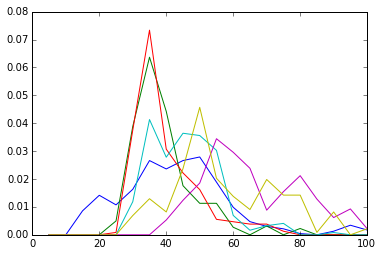

In [15]:
for ens in tis.ensembles:
    myhist = tis.histograms['pathlength'][ens]
    plt.plot(myhist.plot_bins(), myhist.normalized())

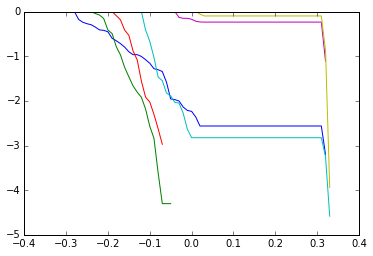

In [24]:
for ens in tis.ensembles:
    myhist = tis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), np.log(myhist.reverse_cumulative()))

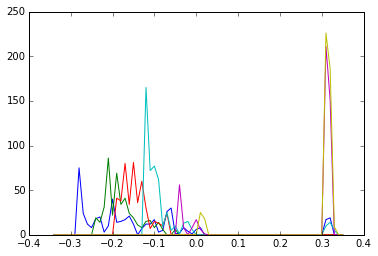

In [29]:
for ens in tis.ensembles:
    myhist = tis.histograms['max_lambda'][ens]
    plt.plot(myhist.plot_bins(), myhist())

In [36]:
df = histograms_to_pandas_dataframe(tis.histograms['max_lambda'].values(), fcn="reverse_cumulative")
from openpathsampling.analysis.wham import WHAM
wham = WHAM()
wham.load_from_dataframe(df)
wham.clean_leading_ones()
wham_hist = wham.wham_bam_histogram()

KeyError: 4

In [23]:
from openpathsampling.analysis.histogram import histograms_to_pandas_dataframe
df = histograms_to_pandas_dataframe(tis.histograms['max_lambda'].values())
df

,max_lambda A->B I'face 5,max_lambda A->B I'face 0,max_lambda A->B I'face 4,max_lambda A->B I'face 2,max_lambda A->B I'face 1,max_lambda A->B I'face 3
-0.34,0,0,0,0,0,0
-0.33,0,0,0,0,0,0
-0.32,0,0,0,0,0,0
-0.31,0,0,0,0,0,0
-0.30,0,0,0,0,0,0
-0.29,0,0,0,0,0,0
-0.28,0,75,0,0,0,0
-0.27,0,24,0,0,0,0
-0.26,0,12,0,0,0,0
-0.25,0,8,0,0,0,0
